## Direct Marketing Data Analysis

The data comes from a direct marketer who sells her products exclusively via direct mail; i.e., she sends catalogs with product descriptions to her customers, and the customers order directly from the catalogs (via phone, internet or mail). The marketer wants to understand why some customers spend more than others and has compiled customer records including:
- Age (coded as young, middle and old)
- Gender
- Home ownership
- Marital status
- Proximity to similar stores
- Salary (\$)
- Number of children
- Past purchasing history (low, mid, high, NA)
- Catalogs received
- Amount spent (\$)

Notably, much of this data, like salary or family status, is unusually detailed for a direct marketer. In real-world scenarios, this information would typically need to be inferred from purchasing behaviour or acquired from third-party sources.

**Goal:** The main goal is to understand spending patterns. The marketer is especially interested in:
- The impact of the number of catalogues sent on spending, due to fixed distribution costs.
- Whether past high value customers continue to spend more.
- Identifying profitable customer subsegments for targeted promotions.

**What we do**:
- Apply data transformations to obtain more consistent relationship patterns.
- Use Trellis graphs to uncover patterns within customer subgroups

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DirectMarketing.csv')

## Scatterplot matrices

Scatterplot matrices can unearth relationships between many different variables in one single graph. The figure below shows a scatterplot matrix of salary, number of catalogs and amount of money spent.

array([[<Axes: xlabel='Salary', ylabel='Salary'>,
        <Axes: xlabel='Catalogs', ylabel='Salary'>,
        <Axes: xlabel='AmountSpent', ylabel='Salary'>],
       [<Axes: xlabel='Salary', ylabel='Catalogs'>,
        <Axes: xlabel='Catalogs', ylabel='Catalogs'>,
        <Axes: xlabel='AmountSpent', ylabel='Catalogs'>],
       [<Axes: xlabel='Salary', ylabel='AmountSpent'>,
        <Axes: xlabel='Catalogs', ylabel='AmountSpent'>,
        <Axes: xlabel='AmountSpent', ylabel='AmountSpent'>]], dtype=object)

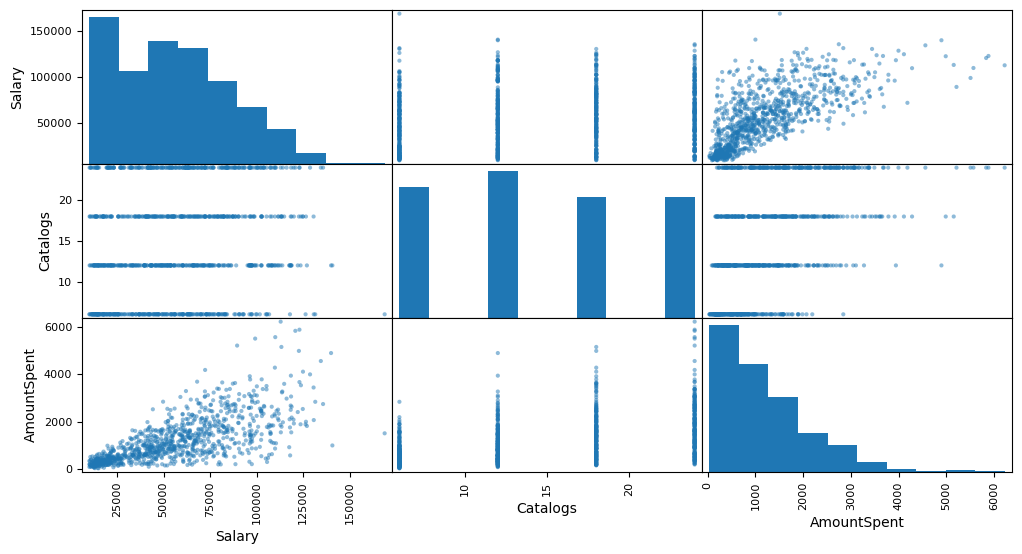

In [4]:
pd.plotting.scatter_matrix(df[['Salary','Catalogs','AmountSpent']], figsize=(12,6))

In [167]:
def scatterplot_matrix(data, names=[], **kwargs):
    """
    Plots a scatterplot matrix of subplots. Each row of "data" is plotted against other rows, resulting in a ncol by ncol grid of subplots with the diagonal subplots labeled with "names". Additional keyword arguments are passed to matplotlib's "plot" command. Returns the matplotlib figure object containing the subplot grid.

    :param data:
    :param names:
    :param kwargs:
    :return:
    """

    # Assumes data is (nrows, ncols)
    nrows, ncols = data.shape
    fig, axs = plt.subplots(nrows=ncols,ncols=ncols,figsize=(10,6))

    for i in range(ncols):
        for j in range(ncols):
            ax = axs[i,j]

            # Hide all ticks and labels
            ax.yaxis.set_visible(False)
            ax.xaxis.set_visible(False)

            # Set up ticks only on one side for the "edge" subplots
            if j == 0:  # first col
                ax.yaxis.set_ticks_position('left')
                ax.yaxis.set_visible(True)


            if i == ncols - 1:  # last row
                ax.xaxis.set_ticks_position('bottom')
                ax.xaxis.set_visible(True)

    # Plot the data.
    #--- Iterate over the pair of indices for the upper triangle of the matrix
    for row, col in zip(*np.triu_indices_from(axs, k=1)):
        # e.g. (row,col) = (0,1), (0,2), (1,2)
        # subplot at axs[0,1] is variable 0 vs 1 (row as y and col as x)
        data_corr = data.iloc[:,row].corr(data.iloc[:,col])
        axs[row,col].annotate(round(data_corr,2),(0.5,0.5), xycoords='axes fraction', ha='center', va='center')

        # to plot lower triangle swap row and col
        # e.g. now (col, row) = (1,0), (2,0), (2,1)
        # subplot at axs[1,0] is variable 1 vs 0 (col as y and row as x)
        axs[col, row].scatter(data.iloc[:, row], data.iloc[:, col], **kwargs)
        axs[col,row].set(xlabel=names[row], ylabel=names[col])

    # Label the diagonal subplots
    if not names:
        names = ['x'+str(i) for i in range(ncols)]

    for i, label in enumerate(names):
        #axs[i,i].annotate(label, (0.5,0.8), xycoords='axes fraction', ha='center', va='center')
        axs[i,i].hist(data.iloc[:,i])
        axs[i,i].set(xlabel=label,ylabel=label)


Here, is a customised

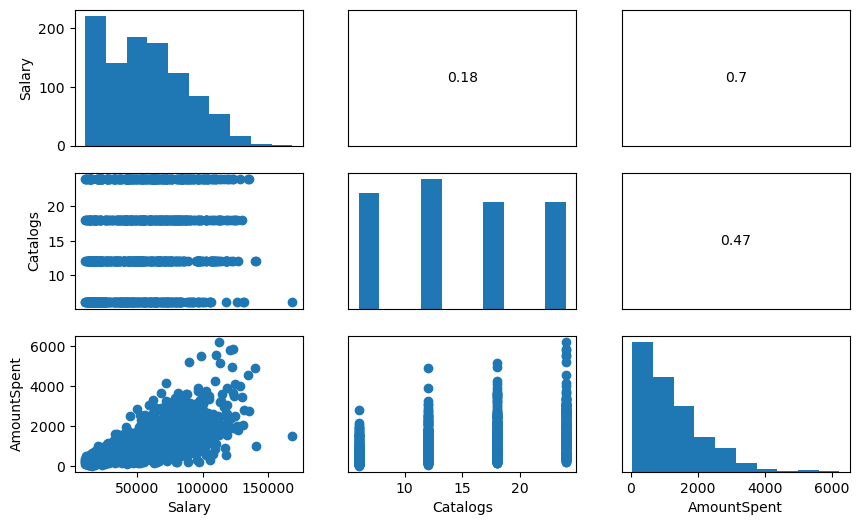

In [168]:
scatterplot_matrix(df[['Salary','Catalogs','AmountSpent']], names=['Salary','Catalogs','AmountSpent'])

**Tldr**:
- Salary is strongly linked to spending
- Skewness doesn't negate the correlation but indicates that the relationship varies, especially among higher earners or spenders.

The figure shows that salary has the strongest correlation with customer spending, which is expected; lower income customers typically spend less. However, both variables are right-skewed, meaning most values are concentrated on the lower end with a long tail extending to the right. This skewness implies that while there's a general trend, the relationship isn't perfectly linear or consistent across all income levels, particularly at the high end, where a small number of individuals may earn or spend disproportionately more.
In fact, if we look at the corresponding scatterplot, then we notice that the points are funnelling out.
In other words, spending variance is low at lower salaries but increases sharply as salary rises. The increasing variance is problematic as it suggests that while we can reasonably predict spending for low-to-mid income customers, spending among high earners is far less predictable, making it harder to effectively target the most potentially profitable segment.

## Data Transformation

Problems with skewed histograms or funnel effects in scatterplots can often be overcome by applying a suitable transformation to the data. We can eliminate this effect by transforming the data in a way that reels in the very large data values while leaving the smaller values unchanged. The logarithmic transformation has this property.


In [237]:
df['log-salary'] = np.log(df['Salary'])
df['log-spent'] = np.log(df['AmountSpent'])

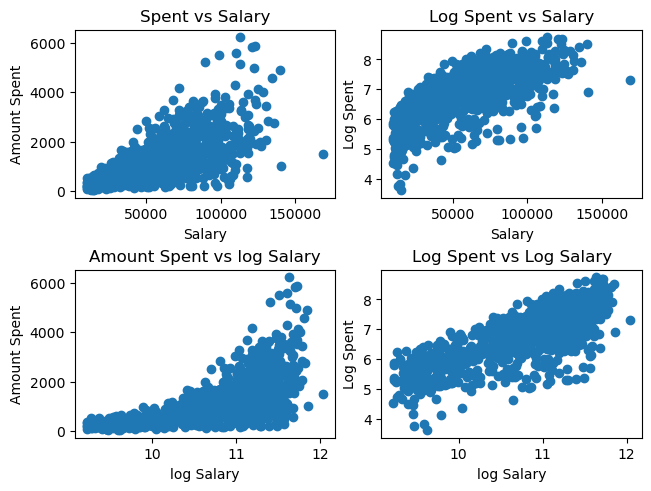

In [238]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2, layout='constrained')
ax1.scatter('Salary','AmountSpent',data=df)
ax1.set(title='Spent vs Salary', xlabel='Salary', ylabel='Amount Spent')

ax2.scatter('Salary','log-spent', data=df)
ax2.set(title='Log Spent vs Salary', xlabel='Salary', ylabel='Log Spent')

ax3.scatter('log-salary', 'AmountSpent', data=df)
ax3.set(title='Amount Spent vs log Salary', xlabel='log Salary', ylabel='Amount Spent')

ax4.scatter('log-salary', 'log-spent', data=df)
ax4.set(title='Log Spent vs Log Salary', xlabel='log Salary', ylabel='Log Spent')
plt.show()

We can see that applying the log-transform to both salary and spent results in a pattern that resembles a straight line. Moreover, the funnel effect has vanished; that is, the variation between the two variables is now the same at all income levels. Thus, if we now base our targeting efforts on the relationship between log-salary and log-spent, then we can target the high spenders with the same accuracy as the low spenders. There are many more transformations (such as exponential, inverse, quadratic, or the power transform) that can lead to similar results in different applications.

## Trellis Graphs

Our analysis thus far has revealed that there exists a linear relationship between (log) salary and (log) Amount spent; in other words, our most profitable customers will be the ones with the highest incomes. But does this relationship apply equally to all our customer segments? For instance, could it be that the rate at which customers spend their earnings varies between old and young customers? The figure below answers the question. It shows a trellis graph, which displays the relationship between two variables(log-salary and log-spent) conditioned on one or more other variables (age and marital status in this case)

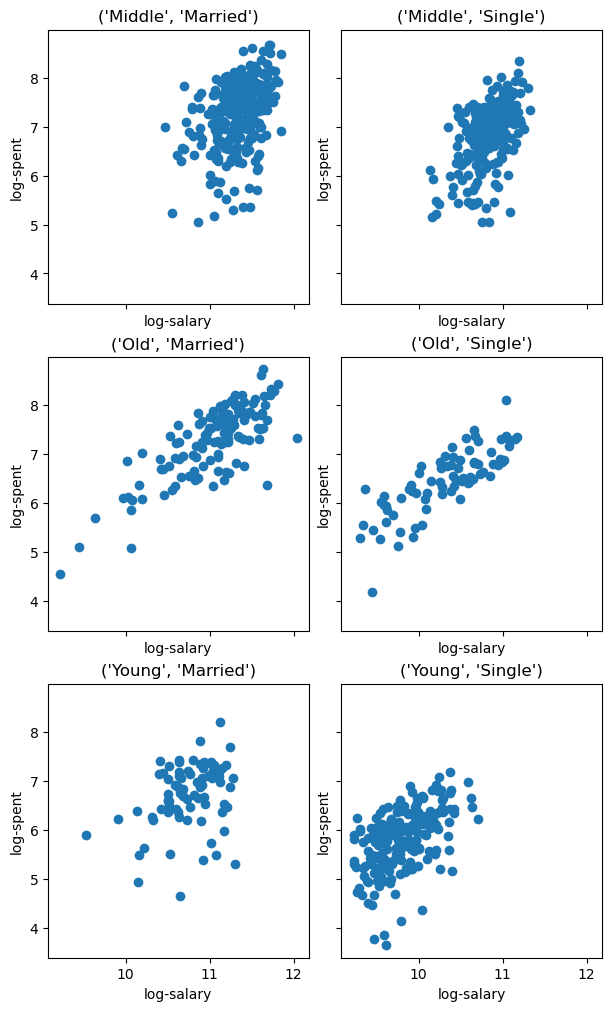

In [290]:
def trellis_graph(x,y,groups,cols=2,):
    """Plots a trellis graph
    :param x:
    :param y:
    :param groups:DataFrame Groupby object
    :param cols:
    :return:
    """
    total_subplots = len(groups)
    rows = total_subplots//cols

    fig, axs = plt.subplots(ncols=cols,nrows=rows,figsize=(6,10), layout='constrained', sharex=True, sharey=True)

    for ax, (name, group) in zip(axs.flat, groups):
        ax.scatter(x=x,y=y,data=group)
        ax.set(title=name,xlabel=x,ylabel=y)

# group by age and marital status
group_age_marital = df.groupby(['Age','Married'])[['log-salary','log-spent']]
trellis_graph('log-salary','log-spent',group_age_marital)
plt.show()

While there is a strong linear relationship for old customers, there is almost no relationship for young married customers. In other words, while we can predict very accurately how much an old customer will spend, we cannot do the same for the young and married customers; we take this as an indication that it would be better to avoid this customer segment altogether. We can also see that the relationship for single middle-aged customers is much stronger (i.e, there is a much steeper trend, hence the rate of spending is much faster)

Thus trellis graphs allow for a more granular inspection of the data and for the discovery of new segment-specific relationships.

## Lessons learned

- Scatterplot matrices are powerful tools for visualising relationships between many different pairs of variables simultaneously. They can also incorporate additional information, such as correlation values or the distribution of individual variables.
- Data transformations help uncover more consistent and interpretable relationships by addressing issues like skewness or funnel effects.
- Trellis graphs enable the exploration of segment-specific patterns and allow us to detect subsegments where relationships change. Unearthing this change of relationship could lead to a different managerial action: it could either lead to more specific, custom-made marketing or advertising, or it could lead to abandoning entire marketing segments altogether where no competitive edge exists.